<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   diagonal      5 non-null      float64
 1   height_left   5 non-null      float64
 2   height_right  5 non-null      float64
 3   margin_low    5 non-null      float64
 4   margin_up     5 non-null      float64
 5   length        5 non-null      float64
 6   id            5 non-null      object 
dtypes: float64(6), object(1)
memory usage: 408.0+ bytes
Optimization terminated successfully.
         Current function value: 0.029058
         Iterations 12

Indentification des billets:

Le billet B_1 est vrai avec 0.9991245540879145 de probabilitée
Le billet B_2 est faux avec 0.00033411083321462965 de probabilitée
Le billet B_3 est vrai avec 0.999960571722646 de probabilitée
Le billet B_4 est faux avec 1.9799055948185074e-07 de probabilitée
Le billet B_5 est faux avec 0.002221972688042908 de probabilité

/Users/aqlice/goinfre/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Representation des billets')

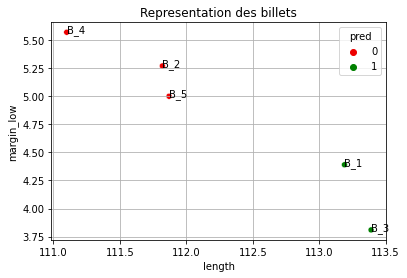

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.api import Logit

## Importation des donnees:
Billet_df = pd.read_csv("billet_complet.csv")                   #Training set
Billet_test_df = pd.read_csv("billets_test_camille.csv")                 #Testing set    

Billet_test_df.info()                                                                   


## Entrainement du modele:
# y (authenticite): 
y_billet = Billet_df.loc[:, Billet_df.columns == "is_genuine"]
    #display(y_billet)

#Training
# On ne garde que les variables significatives a alpha = 5% dans X_Billet:
X_billet = Billet_df[["height_right","margin_low", "margin_up", "length"]]
X_billet = sm.add_constant(X_billet)

# Regression logistique:
reg_log = Logit(endog=y_billet,exog=X_billet)

# Creation du modele:
model_reg_log = reg_log.fit()


## Prediction sur des donnes inconnues:
# Calculs:
X_test = Billet_test_df[["height_right","margin_low","margin_up","length"]]
X_test = sm.add_constant(X_test)
Billet_test_df["proba"] = model_reg_log.predict(X_test)
Billet_test_df["pred"] = (model_reg_log.predict(X_test) >= 0.5).astype(int)

# Affichage des resultats:
print("\nIndentification des billets:\n")
for i, k, j in zip(Billet_test_df["pred"],Billet_test_df["id"],Billet_test_df["proba"]):
    if i == 1:
        print("Le billet","{}".format(k),"est vrai" ,"avec","{}".format(j),"de probabilitée")
    else:
        print("Le billet","{}".format(k),"est faux","avec","{}".format(j),"de probabilitée")


# Affichage des résultats : scatterplot

couleur = ["#ed0000","#008000"]
sns.scatterplot(Billet_test_df['length'], 
                Billet_test_df['margin_low'], 
                hue=Billet_test_df['pred'], 
              legend='auto',palette=couleur)

# affichage de l'id des billets sur le graphique
for i in range(Billet_test_df.shape[0]):
    plt.text(x=Billet_test_df.length[i],y=Billet_test_df.margin_low[i], s=Billet_test_df.id[i], 
          fontdict=dict(color='black',size=10))

plt.grid()
plt.title("Representation des billets")
